In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

# RT Movie

In [2]:
df_rt = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter = '\t', error_bad_lines = False )
df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [3]:
df_rt.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [4]:
df_rt = df_rt.dropna(axis=0, subset = ['rating'])

In [5]:
df_rt = df_rt.dropna(axis=0, subset = ['genre'])

In [6]:
df_rt.isna().sum()

id                 0
synopsis          57
rating             0
genre              0
director         192
writer           442
theater_date     351
dvd_date         351
currency        1212
box_office      1212
runtime           26
studio          1058
dtype: int64

In [7]:
df_rt = df_rt.drop('currency', axis = 1)

In [8]:
df_rt = df_rt.drop('box_office', axis = 1)

In [9]:
df_rt = df_rt.drop('studio', axis = 1)

In [10]:
df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [11]:
df_rt.isna().sum()

id                0
synopsis         57
rating            0
genre             0
director        192
writer          442
theater_date    351
dvd_date        351
runtime          26
dtype: int64

In [12]:
df_rt = df_rt.dropna(axis = 0, subset = ['runtime'])

In [13]:
df_rt = df_rt.dropna(axis = 0, subset = ['synopsis'])

In [14]:
df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [15]:
df_rt.isna().sum()

id                0
synopsis          0
rating            0
genre             0
director        171
writer          394
theater_date    291
dvd_date        291
runtime           0
dtype: int64

# RT2

In [16]:
df_rt2 = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter = "\t", encoding = "unicode-escape")
df_rt2

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [17]:
df_rt2.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [18]:
df_rt2 = df_rt2.dropna(axis= 0, subset=['publisher'])
df_rt2 = df_rt2.dropna(axis= 0, subset=['rating'])
df_rt2

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [19]:
df_rt2.isna().sum()

id               0
review        5536
rating           0
fresh            0
critic        1954
top_critic       0
publisher        0
date             0
dtype: int64

In [20]:
len(df_rt2['top_critic'] == 0)

40688

In [21]:
df_rt2 = df_rt2.drop('top_critic', axis =1)
df_rt2.head(20)

,id,review,rating,fresh,critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,Ozus' World Movie Reviews,"September 25, 2012"


# Movie Gross 

In [53]:
df_movieGross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
df_movieGross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [54]:
df_movieGross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [55]:
df_movieGross = df_movieGross.dropna(axis = 0, subset =['studio'])

In [56]:
df_movieGross = df_movieGross.dropna(axis = 0, subset = ['domestic_gross'])

In [57]:
df_movieGross['foreign_gross'].fillna('0', inplace = True)

In [58]:
df_movieGross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [59]:
df_movieGross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [60]:
df_movieGross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [61]:
df_movieGross['domestic_gross'] = df_movieGross['domestic_gross'].astype(int)

In [62]:
df_movieGross['foreign_gross'] = df_movieGross['foreign_gross'].apply(lambda x: x.replace(",", ""))
df_movieGross['foreign_gross'] = df_movieGross['foreign_gross'].apply(lambda x: x.replace(".", ""))

In [63]:
df_movieGross['foreign_gross'] = df_movieGross['foreign_gross'].astype(int)

In [64]:
df_movieGross['worldwide_gross'] = df_movieGross['domestic_gross'] + df_movieGross['foreign_gross']

In [65]:
df_movieGross = df_movieGross.iloc[:, [0,1,2,3,5,4]]
df_movieGross

,title,studio,domestic_gross,foreign_gross,worldwide_gross,year
0,Toy Story 3,BV,415000000,652000000,1067000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,1025500000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,960300000,2010
3,Inception,WB,292600000,535700000,828300000,2010
4,Shrek Forever After,P/DW,238700000,513900000,752600000,2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,0,6200,2018
3383,Edward II (2018 re-release),FM,4800,0,4800,2018
3384,El Pacto,Sony,2500,0,2500,2018
3385,The Swan,Synergetic,2400,0,2400,2018


In [66]:
df_movieGross.dtypes

title              object
studio             object
domestic_gross      int32
foreign_gross       int32
worldwide_gross     int32
year                int64
dtype: object

In [67]:
df_movieGross.loc[df_movieGross['foreign_gross'] > df_movieGross['domestic_gross']]

,title,studio,domestic_gross,foreign_gross,worldwide_gross,year
0,Toy Story 3,BV,415000000,652000000,1067000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,1025500000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,960300000,2010
3,Inception,WB,292600000,535700000,828300000,2010
4,Shrek Forever After,P/DW,238700000,513900000,752600000,2010
...,...,...,...,...,...,...
3265,Wildlife,IFC,1100000,2000000,3100000,2018
3268,Billionaire Boy's Club,VE,1300,2500000,2501300,2018
3271,Bilal: A New Breed of Hero,VE,491000,1700000,2191000,2018
3275,I Still See You,LGF,1400,1500000,1501400,2018


In [75]:
df_movieGross.dtypes

title              object
studio             object
domestic_gross      int32
foreign_gross       int32
worldwide_gross     int32
year                int64
dtype: object

In [81]:
df_movieGross.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)

studio
BV            4.421291e+10
Fox           3.100537e+10
WB            3.083595e+10
Uni.          2.975719e+10
Sony          2.240492e+10
                  ...     
BSM           5.100000e+03
TAFC          4.600000e+03
Hiber         3.600000e+03
ALP           2.800000e+03
Synergetic    2.400000e+03
Name: worldwide_gross, Length: 255, dtype: float64

In [72]:
df_movieGross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            3356 non-null   object
 1   studio           3356 non-null   object
 2   domestic_gross   3356 non-null   int32 
 3   foreign_gross    3356 non-null   int32 
 4   worldwide_gross  3356 non-null   int32 
 5   year             3356 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 144.2+ KB


In [80]:
df_movieGross['studio'].value_counts()

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
        ... 
IVP        1
Hiber      1
DR         1
EXCL       1
UHE        1
Name: studio, Length: 255, dtype: int64

<AxesSubplot:xlabel='domestic_gross', ylabel='foreign_gross'>

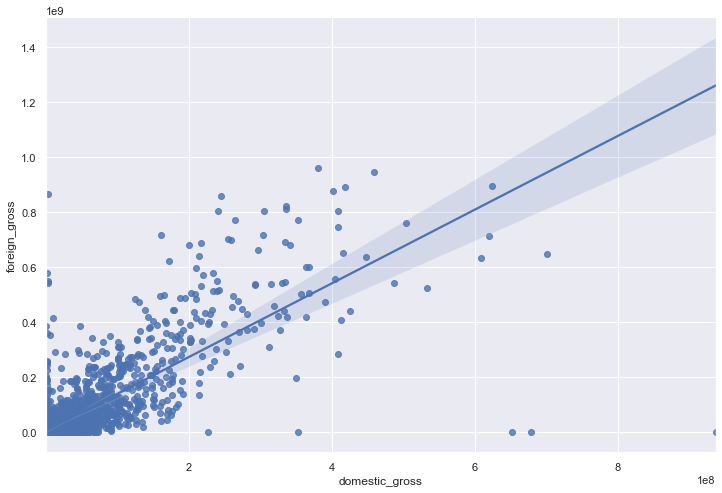

In [69]:
sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_movieGross['domestic_gross'], y=df_movieGross['foreign_gross'])

In [39]:
print(df_movieGross['domestic_gross'].corr(df_movieGross['foreign_gross']))

0.792349501241511


# Tomato

In [110]:
df_tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [111]:
df_tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [112]:
duplicates = df_tmdb[df_tmdb.duplicated()]
print(len(duplicates))

0


In [113]:
df_tmdb = df_tmdb.sort_values('vote_average', ascending=False)
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1


In [114]:
df_tmdb = df_tmdb.loc[df_tmdb['vote_average'] > 5]
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
12149,12149,"[10751, 16, 35, 12]",294512,en,Alpha and Omega: The Legend of the Saw Tooth Cave,1.971,2014-07-21,Alpha and Omega: The Legend of the Saw Tooth Cave,5.1,9
3232,3232,[99],83891,en,Unauthorized: The Harvey Weinstein Project,2.819,2011-10-07,Unauthorized: The Harvey Weinstein Project,5.1,8
11471,11471,[35],281524,en,The Hooligan Factory,6.518,2014-06-13,The Hooligan Factory,5.1,14
11619,11619,"[28, 18, 53]",256687,en,Swelter,5.232,2014-04-20,Swelter,5.1,44


In [115]:
df_tmdb = df_tmdb.drop(df_tmdb[df_tmdb['vote_count'] < 10].index)
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
18747,18747,[35],415735,en,Sebastian Maniscalco: Why Would You Do That?,1.588,2016-10-01,Sebastian Maniscalco: Why Would You Do That?,9.4,10
12553,12553,[10402],19352,en,We Will Rock You,1.267,2014-11-24,We Will Rock You,9.1,11
3108,3108,[10402],63513,en,Lady Gaga Presents: The Monster Ball Tour at M...,3.635,2011-11-21,Lady Gaga Presents: The Monster Ball Tour at M...,8.9,46
6484,6484,[99],375793,en,Demi Lovato: Stay Strong,1.165,2012-03-06,Demi Lovato: Stay Strong,8.8,15
19215,19215,[18],450015,en,20 Seconds of Courage,0.950,2016-04-15,20 Seconds of Courage,8.8,10
...,...,...,...,...,...,...,...,...,...,...
15334,15334,"[28, 80, 53]",330220,en,The Girl is in Trouble,1.876,2015-03-12,The Girl is in Trouble,5.1,15
17951,17951,[18],109453,en,Mothers and Daughters,5.963,2016-05-06,Mothers and Daughters,5.1,66
11471,11471,[35],281524,en,The Hooligan Factory,6.518,2014-06-13,The Hooligan Factory,5.1,14
11619,11619,"[28, 18, 53]",256687,en,Swelter,5.232,2014-04-20,Swelter,5.1,44


In [116]:
print(df_tmdb['vote_count'].corr(df_tmdb['popularity']))

0.722729725011755


<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

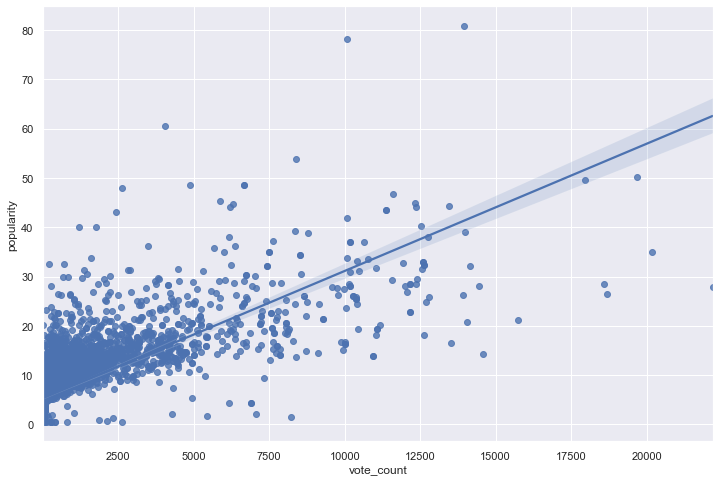

In [117]:
sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_tmdb['vote_count'], y=df_tmdb['popularity'])

# Budget

In [139]:
df_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [140]:
df_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [141]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(lambda x: x.replace(",", ""))

In [142]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(lambda x: x.replace("$", ""))

In [143]:
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(lambda x: x.replace(",", ""))
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(lambda x: x.replace("$", ""))
df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: x.replace(",", ""))
df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: x.replace("$", ""))


In [144]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [145]:
df_budget = df_budget.loc[df_budget['domestic_gross'] != '0']
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [146]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

<ipython-input-146-90ee0b926e96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')


In [147]:
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')

<ipython-input-147-45a883e3cbd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')


In [148]:
df_budget['production_budget'] = df_budget['production_budget'].astype('int64')

<ipython-input-148-e454c05bd2cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['production_budget'] = df_budget['production_budget'].astype('int64')


In [149]:
df_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [150]:
df_budget = df_budget.sort_values('worldwide_gross', ascending=False)
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,673
5466,67,"May 11, 2018",Higher Power,500000,528,528
5769,70,"Apr 1, 1996",Bang,10000,527,527
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,423


In [151]:
df_budget['worldwide_profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']

In [152]:
df_budget['ROI (%)'] = (df_budget['worldwide_profit'] / df_budget['production_budget']) * 100


In [153]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.909239
...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,673,-1799327,-99.962611
5466,67,"May 11, 2018",Higher Power,500000,528,528,-499472,-99.894400
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94.730000
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,423,-399577,-99.894250


In [161]:
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(",", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(".", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(":", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace(" ", ""))
df_budget['movie'] = df_budget['movie'].apply(lambda x: x.replace("-", ""))

In [162]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198
5,6,"Dec 18, 2015",StarWarsEpVIITheForceAwakens,306000000,936662225,2053311220,1747311220,571.016739
6,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400
33,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239
...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",EdandhisDeadMother,1800000,673,673,-1799327,-99.962611
5466,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94.730000
5518,19,"Oct 13, 2005",TheDarkHours,400000,423,423,-399577,-99.894250


In [172]:
df_budget['release_year'] = df_budget['release_date'].str[-4:].astype(int)

In [173]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198,1997
5,6,"Dec 18, 2015",StarWarsEpVIITheForceAwakens,306000000,936662225,2053311220,1747311220,571.016739,2015
6,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018
33,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015
...,...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",EdandhisDeadMother,1800000,673,673,-1799327,-99.962611,1993
5466,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400,2018
5769,70,"Apr 1, 1996",Bang,10000,527,527,-9473,-94.730000,1996
5518,19,"Oct 13, 2005",TheDarkHours,400000,423,423,-399577,-99.894250,2005


In [98]:
print(df_budget['production_budget'].corr(df_budget['worldwide_profit']))

0.6055442534873693


In [99]:
print(df_budget['production_budget'].corr(df_budget['domestic_gross']))

0.6782073951850655


In [100]:
print(df_budget['production_budget'].corr(df_budget['ROI']))

-0.0589766321812598


In [101]:
print(df_budget['production_budget'].corr(df_budget['worldwide_gross']))

0.7448749649291816


In [102]:
 df_budget['worldwide_gross'].mean()

100761506.15494841

In [103]:
# df_budget = df_budget.loc[df_budget['worldwide_gross'] > df_budget['worldwide_gross'].mean()]
# df_budget

Text(0.5, 1.0, 'Relationship Between Production Budget and Box Office Number')

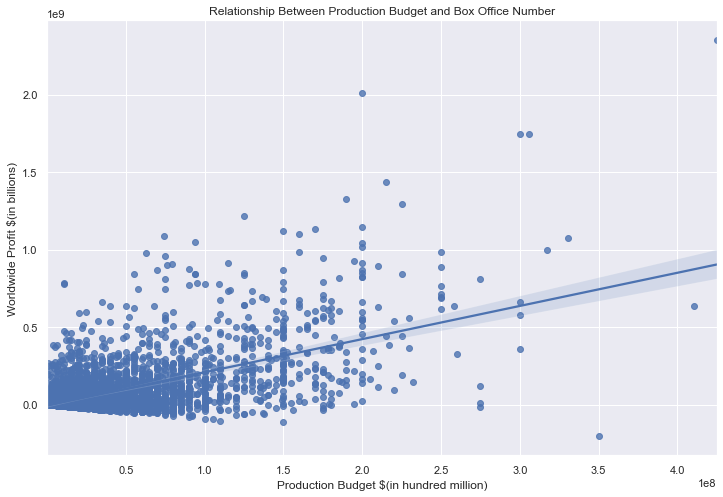

In [225]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_budget['production_budget'], y=df_budget['worldwide_profit'])

ax.set_xlabel('Production Budget $(in hundred million)')
ax.set_ylabel('Worldwide Profit $(in billions)')
ax.set_title('Relationship Between Production Budget and Box Office Number')

# IMDB

In [3]:
conn = sqlite3.connect('zippedData/im.db/im.db')

In [4]:
query = '''
    SELECT *
    FROM sqlite_master
    
'''

pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [181]:
movie_basics = '''
    SELECT *
    FROM movie_basics
    
'''

df_movie_basics = pd.read_sql(movie_basics, conn)
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [182]:
df_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [183]:
df_movie_basics = df_movie_basics.dropna(axis = 0, subset = ['original_title'])

In [184]:
df_movie_basics = df_movie_basics.dropna(axis = 0, subset = ['genres'])

In [185]:
df_movie_basics = df_movie_basics.dropna(axis = 0, subset = ['runtime_minutes'])

In [186]:
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [187]:
movie_ratings = '''
    SELECT *
    FROM movie_ratings
    
    
'''

df_movie_ratings = pd.read_sql(movie_ratings, conn)
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [191]:
df_movie_basics_reviews = df_movie_basics.merge(df_movie_ratings, on = 'movie_id', how = 'left')
df_movie_basics_reviews

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11.0
112228,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
112230,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN


In [192]:
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(",", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(".", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(":", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace(" ", ""))
df_movie_basics_reviews['primary_title'] = df_movie_basics_reviews['primary_title'].apply(lambda x: x.replace("-", ""))

In [193]:
df_movie_basics_reviews

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,OneDayBeforetheRainySeason,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,TheOtherSideoftheWind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,TheWanderingSoapOpera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,AThinLife,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11.0
112228,tt9916170,TheRehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
112229,tt9916186,IllenaudieGeschichteeinerehemaligenHeilundPfle...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
112230,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN


In [196]:
df_movie_reviews_budget = df_budget.merge(df_movie_basics_reviews,
                                         left_on = ['movie', 'release_year'],
                                         right_on = ['primary_title','start_year'],
                                         how = 'inner'
                                         )

In [197]:
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,tt0369610,JurassicWorld,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,67,"Apr 3, 2015",Furious7,190000000,353007020,1518722794,1328722794,699.327786,2015,tt2820852,Furious7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074.0
3,27,"May 4, 2012",TheAvengers,225000000,623279547,1517935897,1292935897,574.638176,2012,tt0848228,TheAvengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
4,4,"May 1, 2015",AvengersAgeofUltron,330600000,459005868,1403013963,1072413963,324.384139,2015,tt2395427,AvengersAgeofUltron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,74,"Oct 26, 2012",TheGhastlyLoveofJohnnyX,2000000,2436,2436,-1997564,-99.878200,2012,tt1754633,TheGhastlyLoveofJohnnyX,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",5.7,386.0
1366,65,"Sep 10, 2014",BorntoFlyElizabethStrebvsGravity,500000,1822,1822,-498178,-99.635600,2014,tt2246526,BorntoFlyElizabethStrebvsGravity,Born to Fly: Elizabeth Streb vs. Gravity,2014,82.0,"Action,Biography,Documentary",6.7,47.0
1367,58,"Oct 23, 2015",TheLookingGlass,300000,1711,1711,-298289,-99.429667,2015,tt2912776,TheLookingGlass,The Looking Glass,2015,110.0,"Drama,Music",5.8,156.0
1368,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,"Documentary,Drama",6.8,17.0


In [213]:
df_movie_reviews_budget = df_movie_reviews_budget.dropna(axis=0, subset=['averagerating'])
df_movie_reviews_budget = df_movie_reviews_budget.dropna(axis=0, subset=['numvotes'])

In [209]:
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,tt0369610,JurassicWorld,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,67,"Apr 3, 2015",Furious7,190000000,353007020,1518722794,1328722794,699.327786,2015,tt2820852,Furious7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074.0
3,27,"May 4, 2012",TheAvengers,225000000,623279547,1517935897,1292935897,574.638176,2012,tt0848228,TheAvengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
4,4,"May 1, 2015",AvengersAgeofUltron,330600000,459005868,1403013963,1072413963,324.384139,2015,tt2395427,AvengersAgeofUltron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,74,"Oct 26, 2012",TheGhastlyLoveofJohnnyX,2000000,2436,2436,-1997564,-99.878200,2012,tt1754633,TheGhastlyLoveofJohnnyX,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",5.7,386.0
1366,65,"Sep 10, 2014",BorntoFlyElizabethStrebvsGravity,500000,1822,1822,-498178,-99.635600,2014,tt2246526,BorntoFlyElizabethStrebvsGravity,Born to Fly: Elizabeth Streb vs. Gravity,2014,82.0,"Action,Biography,Documentary",6.7,47.0
1367,58,"Oct 23, 2015",TheLookingGlass,300000,1711,1711,-298289,-99.429667,2015,tt2912776,TheLookingGlass,The Looking Glass,2015,110.0,"Drama,Music",5.8,156.0
1368,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,"Documentary,Drama",6.8,17.0


In [215]:
df_movie_reviews_budget['genres'] = df_movie_reviews_budget['genres'].str.split(',')

In [216]:
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,tt0369610,JurassicWorld,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338.0
2,67,"Apr 3, 2015",Furious7,190000000,353007020,1518722794,1328722794,699.327786,2015,tt2820852,Furious7,Furious Seven,2015,137.0,"[Action, Crime, Thriller]",7.2,335074.0
3,27,"May 4, 2012",TheAvengers,225000000,623279547,1517935897,1292935897,574.638176,2012,tt0848228,TheAvengers,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655.0
4,4,"May 1, 2015",AvengersAgeofUltron,330600000,459005868,1403013963,1072413963,324.384139,2015,tt2395427,AvengersAgeofUltron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",7.3,665594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,74,"Oct 26, 2012",TheGhastlyLoveofJohnnyX,2000000,2436,2436,-1997564,-99.878200,2012,tt1754633,TheGhastlyLoveofJohnnyX,The Ghastly Love of Johnny X,2012,106.0,"[Comedy, Fantasy, Musical]",5.7,386.0
1366,65,"Sep 10, 2014",BorntoFlyElizabethStrebvsGravity,500000,1822,1822,-498178,-99.635600,2014,tt2246526,BorntoFlyElizabethStrebvsGravity,Born to Fly: Elizabeth Streb vs. Gravity,2014,82.0,"[Action, Biography, Documentary]",6.7,47.0
1367,58,"Oct 23, 2015",TheLookingGlass,300000,1711,1711,-298289,-99.429667,2015,tt2912776,TheLookingGlass,The Looking Glass,2015,110.0,"[Drama, Music]",5.8,156.0
1368,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,"[Documentary, Drama]",6.8,17.0


In [220]:
df_movie_reviews_budget = df_movie_reviews_budget.explode('genres')
df_movie_reviews_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI (%),release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,Action,8.5,670926.0
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,Adventure,8.5,670926.0
0,7,"Apr 27, 2018",AvengersInfinityWar,300000000,678815482,2048134200,1748134200,582.711400,2018,tt4154756,AvengersInfinityWar,Avengers: Infinity War,2018,149.0,Sci-Fi,8.5,670926.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,tt0369610,JurassicWorld,Jurassic World,2015,124.0,Action,7.0,539338.0
1,34,"Jun 12, 2015",JurassicWorld,215000000,652270625,1648854864,1433854864,666.909239,2015,tt0369610,JurassicWorld,Jurassic World,2015,124.0,Adventure,7.0,539338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,Documentary,6.8,17.0
1368,1,"Dec 14, 2018",ThatWayMadnessLies,650000,1447,1447,-648553,-99.777385,2018,tt6264264,ThatWayMadnessLies,That Way Madness Lies...,2018,101.0,Drama,6.8,17.0
1369,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400,2018,tt2924392,HigherPower,Higher Power,2018,93.0,Action,5.3,2152.0
1369,67,"May 11, 2018",HigherPower,500000,528,528,-499472,-99.894400,2018,tt2924392,HigherPower,Higher Power,2018,93.0,Sci-Fi,5.3,2152.0


In [230]:
genre_rank = df_movie_reviews_budget.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)
genre_rank

genres
Adventure      125673414131
Action         108637152736
Comedy          69569202907
Drama           54433063372
Sci-Fi          46598985811
Animation       38042610886
Fantasy         31463549241
Thriller        30303040281
Crime           18821400221
Family          18174750808
Horror          13315196111
Romance         12796719790
Mystery         11601772034
Biography       10775922398
Music            3654800015
History          3423418652
Musical          2874302681
Sport            1751652056
Western          1151208373
War               981814622
Documentary       881603451
Name: worldwide_gross, dtype: int64

Text(0.5, 1.0, 'Relationship Between Production Budget and Audience Votes')

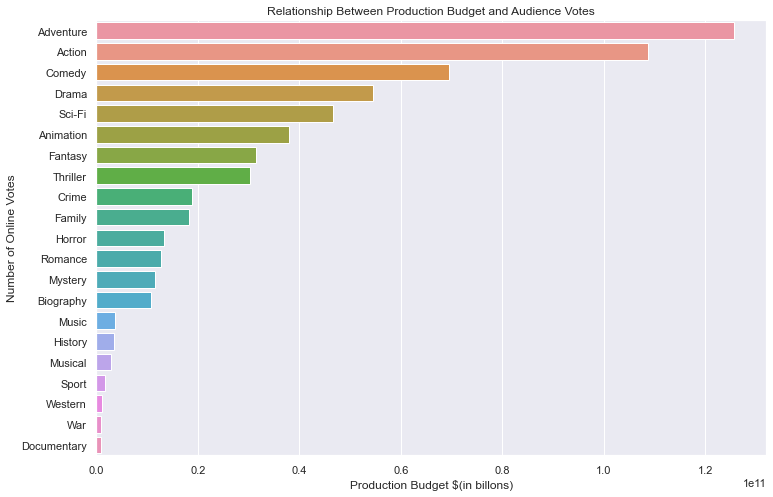

In [231]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.barplot(x=genre_rank.values, y=genre_rank.index)

ax.set_xlabel('Production Budget $(in billons)')
ax.set_ylabel('Number of Online Votes')
ax.set_title('Relationship Between Production Budget and Audience Votes')

In [204]:
# df_movie_reviews_budget.iloc[:, [0,1,2,3,5,6,16]]

Text(0.5, 1.0, 'Relationship Between Production Budget and Audience Votes')

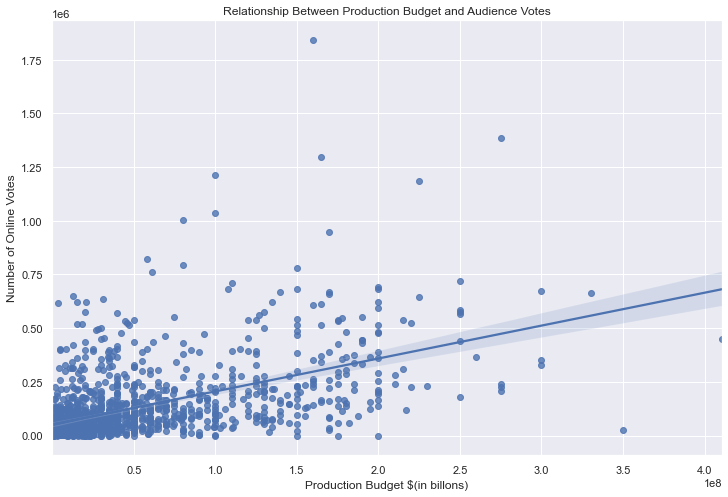

In [205]:
fig, ax = plt.subplots()

sns.set(rc= {"figure.figsize": (12,8)})
sns.regplot(x=df_movie_reviews_budget['production_budget'], y=df_movie_reviews_budget['numvotes'])

ax.set_xlabel('Production Budget $(in billons)')
ax.set_ylabel('Number of Online Votes')
ax.set_title('Relationship Between Production Budget and Audience Votes')

In [373]:
directors = '''
    SELECT *
    FROM directors
    
'''

pd.read_sql(directors, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [374]:
known_for = '''
    SELECT *
    FROM known_for
    
'''

pd.read_sql(known_for, conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [591]:
movie_akas = '''
    SELECT *
    FROM movie_akas
    
'''

df_movie_akas = pd.read_sql(movie_akas, conn)
df_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [592]:
df_movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [593]:
df_movie_akas = df_movie_akas.drop('attributes', axis = 1)

In [594]:
df_movie_akas = df_movie_akas.drop('language', axis = 1)

In [626]:
df_movie_akas = df_movie_akas.drop('is_original_title', axis = 1)

In [628]:
df_movie_akas.head(30)

,movie_id,ordering,title,region,types
0,tt0369610,10,Джурасик свят,BG,None
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay
3,tt0369610,13,O Mundo dos Dinossauros,BR,None
4,tt0369610,14,Jurassic World,FR,imdbDisplay
5,tt0369610,15,Jurassic World,GR,imdbDisplay
6,tt0369610,16,Jurassic World,IT,imdbDisplay
7,tt0369610,17,Jurski svijet,HR,imdbDisplay
8,tt0369610,18,Olam ha'Yura,IL,imdbDisplay
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,imdbDisplay


In [20]:
persons = '''
    SELECT *
    FROM persons
    
'''

df_persons = pd.read_sql(persons, conn)
df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [21]:
df_persons.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [22]:
df_persons = df_persons.drop('birth_year', axis = 1)

In [23]:
df_persons = df_persons.drop('death_year', axis = 1)

In [24]:
df_persons

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [25]:
principals = '''
    SELECT *
    FROM principals
    
'''

df_principals = pd.read_sql(principals, conn)
df_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [26]:
# persons_principals = '''
#     SELECT *
#     FROM principals as PRI
#     LEFT JOIN persons as PER
#         ON PRI.person_id
    
    
# '''

# df_person_principals = pd.read_sql(persons_principals, conn)

In [28]:
df_pp = df_principals.merge(df_persons, on = 'person_id', how = 'left')
df_pp

,movie_id,ordering,person_id,category,job,characters,primary_name,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",Tommy Dysart,actor
1,tt0111414,2,nm0398271,director,None,None,Frank Howson,"actor,writer,producer"
2,tt0111414,3,nm3739909,producer,producer,None,Barry Porter-Robinson,"producer,art_department"
3,tt0323808,10,nm0059247,editor,None,None,Sean Barton,"editor,editorial_department,assistant_director"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,"actress,soundtrack"
...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]",Kenneth Cranham,"actor,soundtrack"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]",Pearl Mackie,actress
1028183,tt9692684,3,nm10441594,director,None,None,Guy Jones,director
1028184,tt9692684,4,nm6009913,writer,writer,None,Sabrina Mahfouz,writer


In [379]:
writers = '''
    SELECT *
    FROM writers
    
'''

pd.read_sql(writers, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825
